In [1]:
import pandas as pd


In [2]:
df = pd.read_csv("./AutoInsClaims.csv")

In [3]:
df.dtypes

HOUSEHOLD_ID                object
DRIVER_ID                   object
POLICY_ID                   object
CLAIM_ID                    object
INCIDENT_CAUSE               int64
DESCRIPTION                float64
CLAIM_STATUS                 int64
ODOMETER_AT_LOSS           float64
LOSS_EVENT_TIME             object
CLAIM_INIT_TIME             object
POLICE_REPORT                int64
CLAIMS_AT_LOSS_DATE          int64
LOSS_LOCATION_LAT          float64
LOSS_LOCATION_LONG         float64
CLAIM_AMOUNT               float64
FLAG_FOR_FRAUD_INV           int64
PRIMARY_DRIVER_ID           object
START_DATE                  object
EXPIRY_DATE                 object
MODEL_YEAR                   int64
MAKE                        object
MODEL                       object
PLATE                       object
COLOR                       object
INITIAL_ODOMETER             int64
LOW_MILEAGE_USE              int64
FIRST_NAME                  object
LAST_NAME                   object
GENDER              

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   HOUSEHOLD_ID             975 non-null    object 
 1   DRIVER_ID                975 non-null    object 
 2   POLICY_ID                975 non-null    object 
 3   CLAIM_ID                 975 non-null    object 
 4   INCIDENT_CAUSE           975 non-null    int64  
 5   DESCRIPTION              0 non-null      float64
 6   CLAIM_STATUS             975 non-null    int64  
 7   ODOMETER_AT_LOSS         975 non-null    float64
 8   LOSS_EVENT_TIME          975 non-null    object 
 9   CLAIM_INIT_TIME          975 non-null    object 
 10  POLICE_REPORT            975 non-null    int64  
 11  CLAIMS_AT_LOSS_DATE      975 non-null    int64  
 12  LOSS_LOCATION_LAT        975 non-null    float64
 13  LOSS_LOCATION_LONG       975 non-null    float64
 14  CLAIM_AMOUNT             9

In [5]:
df.isnull().sum()

HOUSEHOLD_ID                 0
DRIVER_ID                    0
POLICY_ID                    0
CLAIM_ID                     0
INCIDENT_CAUSE               0
DESCRIPTION                975
CLAIM_STATUS                 0
ODOMETER_AT_LOSS             0
LOSS_EVENT_TIME              0
CLAIM_INIT_TIME              0
POLICE_REPORT                0
CLAIMS_AT_LOSS_DATE          0
LOSS_LOCATION_LAT            0
LOSS_LOCATION_LONG           0
CLAIM_AMOUNT                 0
FLAG_FOR_FRAUD_INV           0
PRIMARY_DRIVER_ID            0
START_DATE                   0
EXPIRY_DATE                  0
MODEL_YEAR                   0
MAKE                         0
MODEL                        0
PLATE                        0
COLOR                        0
INITIAL_ODOMETER             0
LOW_MILEAGE_USE              0
FIRST_NAME                   0
LAST_NAME                    0
GENDER                       0
BIRTHDATE                    0
SSN                          0
DRIVERS_LICENSE_ID           0
DRIVERS_

In [6]:
df[df.duplicated()].shape

(0, 38)

<AxesSubplot:>

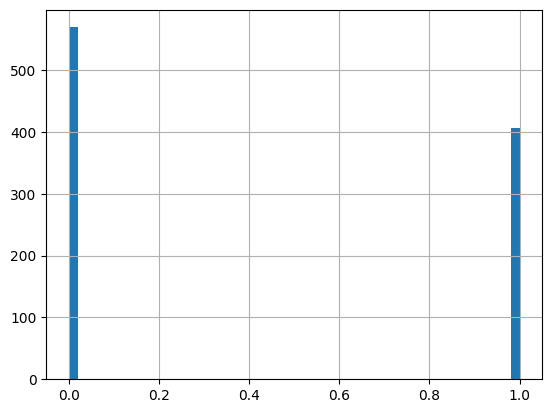

In [7]:
#Visualization

df.FLAG_FOR_FRAUD_INV.hist(bins=50)

In [8]:
df.FLAG_FOR_FRAUD_INV.value_counts()

FLAG_FOR_FRAUD_INV
0    569
1    406
Name: count, dtype: int64

In [10]:
df.describe()

,INCIDENT_CAUSE,DESCRIPTION,CLAIM_STATUS,ODOMETER_AT_LOSS,POLICE_REPORT,CLAIMS_AT_LOSS_DATE,LOSS_LOCATION_LAT,LOSS_LOCATION_LONG,CLAIM_AMOUNT,FLAG_FOR_FRAUD_INV,MODEL_YEAR,INITIAL_ODOMETER,LOW_MILEAGE_USE,COMMUTE_DISCOUNT
count,975.000000,0.0,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000
mean,2.974359,NaN,2.196923,178585.283282,0.429744,1.603077,41.858827,-87.676931,12476.822564,0.416410,2008.503590,170987.852308,0.092308,0.060513
std,1.503029,NaN,0.995983,99500.258502,0.495293,1.155022,0.085914,0.058369,13697.986713,0.493216,4.701537,99443.427598,0.289608,0.238557
min,1.000000,NaN,1.000000,21015.800000,0.000000,1.000000,41.651701,-87.905309,1000.000000,0.000000,1991.000000,18348.000000,0.000000,0.000000
25%,2.000000,NaN,1.000000,99356.900000,0.000000,1.000000,41.783034,-87.720619,1900.000000,0.000000,2006.000000,92310.000000,0.000000,0.000000
50%,3.000000,NaN,3.000000,163689.500000,0.000000,1.000000,41.874328,-87.673203,2780.000000,0.000000,2009.000000,155652.000000,0.000000,0.000000
75%,5.000000,NaN,3.000000,238025.200000,1.000000,2.000000,41.923888,-87.631030,24300.000000,1.000000,2012.000000,230514.000000,0.000000,0.000000
max,5.000000,NaN,4.000000,593427.400000,1.000000,8.000000,42.021691,-87.527492,48035.500000,1.000000,2016.000000,585828.000000,1.000000,1.000000


c:\Program Files\Python39\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


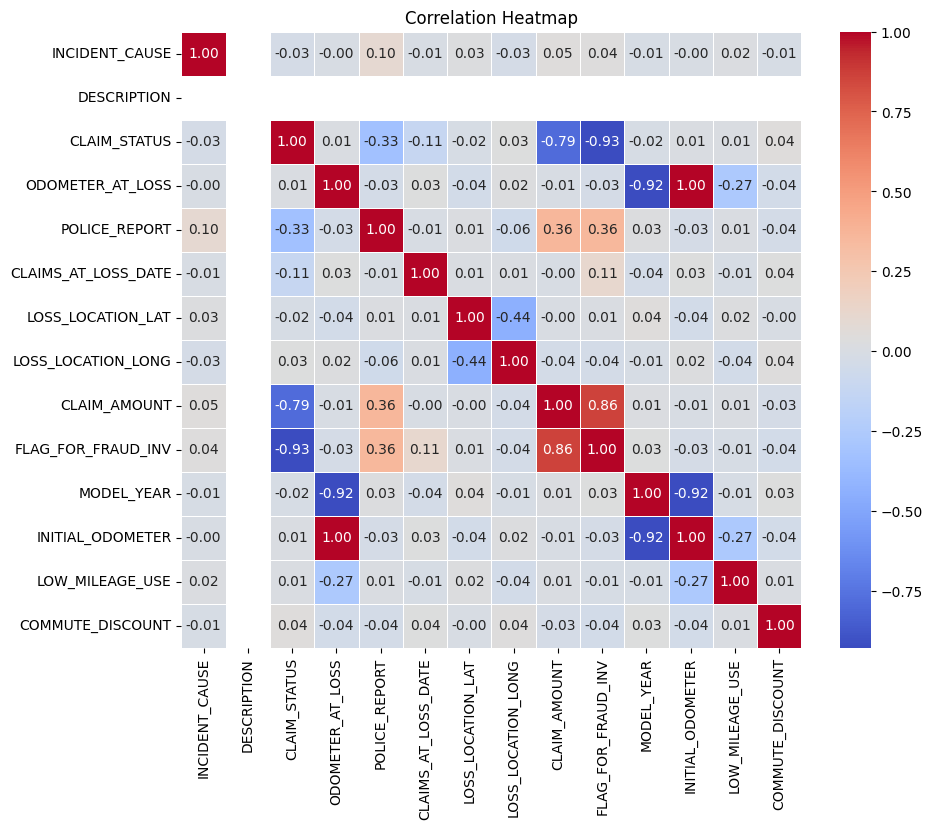

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)

# Add title
plt.title('Correlation Heatmap')

# Show plot
plt.show()



Here we already know the target variable is "FLAG_FOR_FRAUD_INV" and we can observe the relation between the claim status and FLAG_FOR_FRAUD_INV

'HOUSEHOLD_ID' - House Holder Id
'DRIVER_ID'    - Driver's ID
'POLICY_ID'    - Policy ID of the insurance
'CLAIM_ID'     - Claim ID of insurance
'INCIDENT_CAUSE'  - The cause of the incident (ex: accident,toofan...etc)
'DESCRIPTION'  - Description of the incident
'CLAIM_STATUS' - claimed or not
'ODOMETER_AT_LOSS'  - Number of kilometers travelled at the time of incident
'LOSS_EVENT_TIME'   - When the incident is happened?
'CLAIM_INIT_TIME',  - When the victim is applied for claim?
'POLICE_REPORT'     - Do the victim has police report or not?
'CLAIMS_AT_LOSS_DATE'   - the count of previous claims made by the policyholder at the time of the      loss    event date
'LOSS_LOCATION_LAT'     - Lattitude Number of incident happened place
'LOSS_LOCATION_LONG'    - Longitude Number of incident happened place
'CLAIM_AMOUNT'      -    The amount to be claimed
'FLAG_FOR_FRAUD_INV'    - Suspect if the policy holder is fraud or not (0 or 1)
'PRIMARY_DRIVER_ID'     - Main driver ID
'START_DATE'        -  Insurance start date
'EXPIRY_DATE'       - Insurance Expiry date
'MODEL_YEAR'        - Car's model
'MAKE'       - Car's brand
'MODEL'      - Car's variant
'PLATE'      - Number on number plate
'COLOR'      - Number plate color
'INITIAL_ODOMETER'  - Number of kilometers travelled at the time of insurance policy taken
'LOW_MILEAGE_USE'   -  number of miles or kilometers a vehicle has been driven over a certain period of time
'FIRST_NAME'        -  firstname
'LAST_NAME'         - last  name
'GENDER'     -  gender
'BIRTHDATE'  - date of birth
'SSN'        - Social Security Number (like adar number in US)
'DRIVERS_LICENSE_ID'  - Driver's Licence ID
'DRIVERS_LICENSE_EXPIRY' - When the licence is going to exipire
'DRIVERS_LICENSE_STATE'  - To Which state the driver licence belongs  to.
'DATE_AT_CURRENT_ADDRESS'- date when each insured individual moved to their current address  
'CONTACT_NUMBER'     - Contact number 
'EMAIL'   -  Email address
'COMMUTE_DISCOUNT' - discount offered by insurance companies to policyholders who use their vehicles primarily for commuting to work or school

Data Preparation:
We need to prepare the data to get the independent variables  based on following conditions
1)Claims filed after the expiration of the insurance policy  
2)Claims filed after the license expiration date
3)Excessive claim amount, which is over $10,000 in value